In [20]:
using DataFrames, CSV
using Plots
using StatsPlots: @df, StatsPlots
pyplot();


In [6]:
data = CSV.read("data/scores.txt");



In [7]:
newnames = ["Score_1", "Score_2","Result"];
names!(data, Symbol.(newnames));


In [11]:
head(data,10)

┌ Warning: `head(df::AbstractDataFrame, n::Integer)` is deprecated, use `first(df, n)` instead.
│   caller = top-level scope at In[11]:1
└ @ Core In[11]:1


,Score_1,Score_2,Result
,Float64,Float64,Int64
1,30.2867,43.895,0
2,35.8474,72.9022,0
3,60.1826,86.3086,1
4,79.0327,75.3444,1
5,45.0833,56.3164,0
6,61.1067,96.5114,1
7,75.0247,46.554,1
8,76.0988,87.4206,1
9,84.4328,43.5334,1


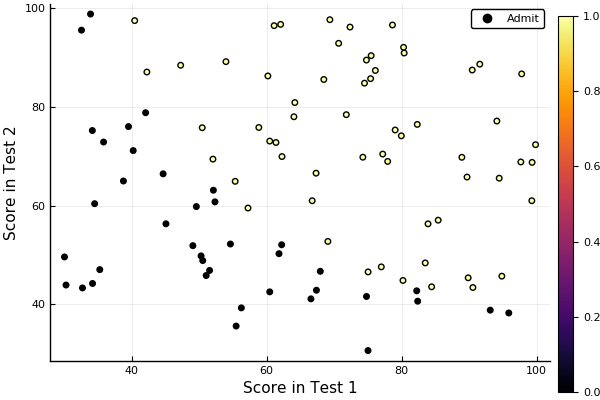

In [21]:
@df data scatter(:Score_1,:Score_2, zcolor= :Result, xaxis = "Score in Test 1", yaxis="Score in Test 2", lab="Admit")


In [22]:
using Flux
using Statistics
using Flux.Tracker, Statistics
using Flux.NNlib
using Flux: throttle, normalise
using Flux: binarycrossentropy
using Base.Iterators: repeated
using Flux: @epochs


In [23]:
## Splitting the features i.e. scores in tests here (X) and the categories i.e. admit or reject here (Y)
X = convert(Array,data[:,[:Score_1,:Score_2]]); #features
y = convert(Array,data[:Result]);  #Y-values
## To see number of training samples
num_tr_ex = length(y); #99


┌ Warning: `convert(::Type{Array}, df::AbstractDataFrame)` is deprecated, use `convert(Matrix, df)` instead.
│   caller = top-level scope at In[23]:1
└ @ Core In[23]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[23]:3
└ @ Core In[23]:3


In [24]:
X = (X .- mean(X, dims = [99,1])) ./ std(X, dims = [99,1]);

In [25]:
size(X), size(y)


((99, 2), (99,))

In [29]:
## Building a simple model for Logistic regression in Flux
## param() lets the Flux know about the MLP parameters to train
W = param(zeros(2))
b = param([0.])

## Here W is a matrix of weights for the MLP and b is the bias added with the weights.
## So our MLP is having two input nodes ( as we have 2 features which are Score 1 and Score 2) followed by 1 hidden
## layer with 4 nodes and then 1 output node ( as we have only 2 categories).


## This is our prediction function (basically the MLP)
## Here the output is it sigmoid of the perceptron output. The sigmoid activation function lets us classify the output
## into categories for binary logistic regression
## σ(x) = 1 / (1 + exp(-x))

predict(x) = NNlib.σ.(x*W .+ b)


predict (generic function with 1 method)

In [35]:
loss(x, y) = sum(binarycrossentropy.(predict(x), y))/num_tr_ex

loss (generic function with 1 method)

In [36]:
par = Params([W, b])
## Stocastic Gradient Descent with learning rate 0.01
opt = SGD(par, 0.1; decay = 0)
evalcb() = @show(loss(X, y))


┌ Warning: SGD(params) is deprecated; use Descent(η::Float64) instead
│   caller = ip:0x0
└ @ Core :-1


evalcb (generic function with 1 method)

In [39]:
data = repeated((X, y), 200)
Flux.train!(loss, data, opt, cb = evalcb)
# train!(loss, par, data, opt)

loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (tracked)
loss(X, y) = 0.6931471805599452 (t